In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power
from scipy.linalg import fractional_matrix_power
from scipy.linalg import logm
import scipy.io
from numpy.linalg import inv
from numpy.linalg import eig
from numpy import transpose as trans

import os
from conditional_divergence import *

In [2]:
#Landmine data
landmineData = scipy.io.loadmat("LandmineData/LandmineData.mat")
Features = landmineData["feature"]
Labels = landmineData["label"]


In [3]:
type(landmineData)

dict

In [4]:
kernel_size = 0.05
All_Features = Features[0,0]
All_Labels = Labels[0,0]
for i in range(1,Features.shape[1]):
    All_Features = np.vstack((All_Features,Features[0,i]))
    All_Labels = np.vstack((All_Labels,Labels[0,i]))

Data = [0]*Features.shape[1]
for i in range(0,Features.shape[1]):
    Data[i]= np.array(Features[0,i])

n_atts = Features[0,0].shape[1]
n_dists = 1
n_tasks_dist = Features.shape[1]

Tasks_Cov_X = []
Tasks_Cov_XY = []
Tasks_CorrEnt_X = []
Tasks_CorrEnt_XY = []
for i in range(n_dists*n_tasks_dist):
    print("Task",i)
    data = Data[i].transpose()
    Cov = np.array([[np.cov(data[i,:],data[j,:])[0,1] for j in range(data.shape[0])] for i in range(data.shape[0])])
    Tasks_Cov_X.append(Cov)
    
    data = Data[i]
    Corr = corrent_matrix(data,kernel_size)
    Tasks_CorrEnt_X.append(Corr)


    data =np.hstack( (Data[i],Labels[0,i])).transpose()
    Cov = np.array([[np.cov(data[i,:],data[j,:])[0,1] for j in range(data.shape[0])] for i in range(data.shape[0])])
    Tasks_Cov_XY.append(Cov)

    data =np.hstack( (Data[i],Labels[0,i]))
    Corr = corrent_matrix(data,kernel_size)
    Tasks_CorrEnt_XY.append(Corr)


Task 0
Task 1
Task 2
Task 3
Task 4
Task 5
Task 6
Task 7
Task 8
Task 9
Task 10
Task 11
Task 12
Task 13
Task 14
Task 15
Task 16
Task 17
Task 18
Task 19
Task 20
Task 21
Task 22
Task 23
Task 24
Task 25
Task 26
Task 27
Task 28


In [6]:
for i,corr in enumerate(Tasks_CorrEnt_X):
    if not is_pos_def(corr):
        print("Non Positive Task X:",i)
    
for i,corr in enumerate(Tasks_CorrEnt_XY):
        if not is_pos_def(corr):
            print("Non Positive Task XY:",i)


In [7]:

n_dim =  n_dists * n_tasks_dist

von_Neumann_Cov_X =np.zeros((n_dim,n_dim))
von_Neumann_Cov_XY =np.zeros((n_dim,n_dim))
von_Neumann_CorrEnt_X =np.zeros((n_dim,n_dim))
von_Neumann_CorrEnt_XY =np.zeros((n_dim,n_dim))

LogDet_Cov_X =np.zeros((n_dim,n_dim))
LogDet_Cov_XY =np.zeros((n_dim,n_dim))
LogDet_CorrEnt_X =np.zeros((n_dim,n_dim))
LogDet_CorrEnt_XY =np.zeros((n_dim,n_dim))


for i in range(n_dim):        
    for j in range(n_dim):
        von_Neumann_Cov_X[i,j] = von_Neumann_divergence_Eff(Tasks_Cov_X[i],Tasks_Cov_X[j])
        von_Neumann_Cov_XY[i,j] = von_Neumann_divergence_Eff(Tasks_Cov_XY[i],Tasks_Cov_XY[j])
        von_Neumann_CorrEnt_X[i,j] = von_Neumann_divergence_Eff(Tasks_CorrEnt_X[i],Tasks_CorrEnt_X[j])
        von_Neumann_CorrEnt_XY[i,j] = von_Neumann_divergence_Eff(Tasks_CorrEnt_XY[i],Tasks_CorrEnt_XY[j])
        LogDet_Cov_X[i,j] = log_det_divergenceEigSort(Tasks_Cov_X[i],Tasks_Cov_X[j])
        LogDet_Cov_XY[i,j] = log_det_divergenceEigSort(Tasks_Cov_XY[i],Tasks_Cov_XY[j])
        LogDet_CorrEnt_X[i,j] = log_det_divergenceEigSort(Tasks_CorrEnt_X[i],Tasks_CorrEnt_X[j])
        LogDet_CorrEnt_XY[i,j] = log_det_divergenceEigSort(Tasks_CorrEnt_XY[i],Tasks_CorrEnt_XY[j])


Div_von_Neumann_Cov =np.zeros((n_dim,n_dim))
Div_von_Neumann_CorrEnt =np.zeros((n_dim,n_dim))
Div_LogDet_Cov =np.zeros((n_dim,n_dim))
Div_LogDet_CorrEnt =np.zeros((n_dim,n_dim))

for i in range(n_dim):        
    for j in range(i+1):
        Div_von_Neumann_Cov[i,j] = 0.5*(von_Neumann_Cov_XY[i,j] + von_Neumann_Cov_XY[j,i] - von_Neumann_Cov_X[i,j] - von_Neumann_Cov_X[j,i])
        Div_von_Neumann_CorrEnt[i,j] = 0.5*(von_Neumann_CorrEnt_XY[i,j] + von_Neumann_CorrEnt_XY[j,i] - von_Neumann_CorrEnt_X[i,j] - von_Neumann_CorrEnt_X[j,i])
        Div_LogDet_Cov[i,j] = 0.5*(LogDet_Cov_XY[i,j] + LogDet_Cov_XY[j,i] - LogDet_Cov_X[i,j] - LogDet_Cov_X[j,i])
        Div_LogDet_CorrEnt[i,j] = 0.5*(LogDet_CorrEnt_XY[i,j] + LogDet_CorrEnt_XY[j,i] - LogDet_CorrEnt_X[i,j] - LogDet_CorrEnt_X[j,i])
        Div_von_Neumann_Cov[j,i] = Div_von_Neumann_Cov[i,j]
        Div_von_Neumann_CorrEnt[j,i] = Div_von_Neumann_CorrEnt[i,j]
        Div_LogDet_Cov[j,i] = Div_LogDet_Cov[i,j]
        Div_LogDet_CorrEnt[j,i] = Div_LogDet_CorrEnt[i,j]


In [8]:
Div_von_Neumann_Cov_temp = Div_von_Neumann_Cov
Div_von_Neumann_CorrEnt_temp = Div_von_Neumann_CorrEnt
Div_LogDet_Cov_temp = Div_LogDet_Cov
Div_LogDet_CorrEnt_temp = Div_LogDet_CorrEnt

Landmine data, linear kernel


<Figure size 432x288 with 0 Axes>

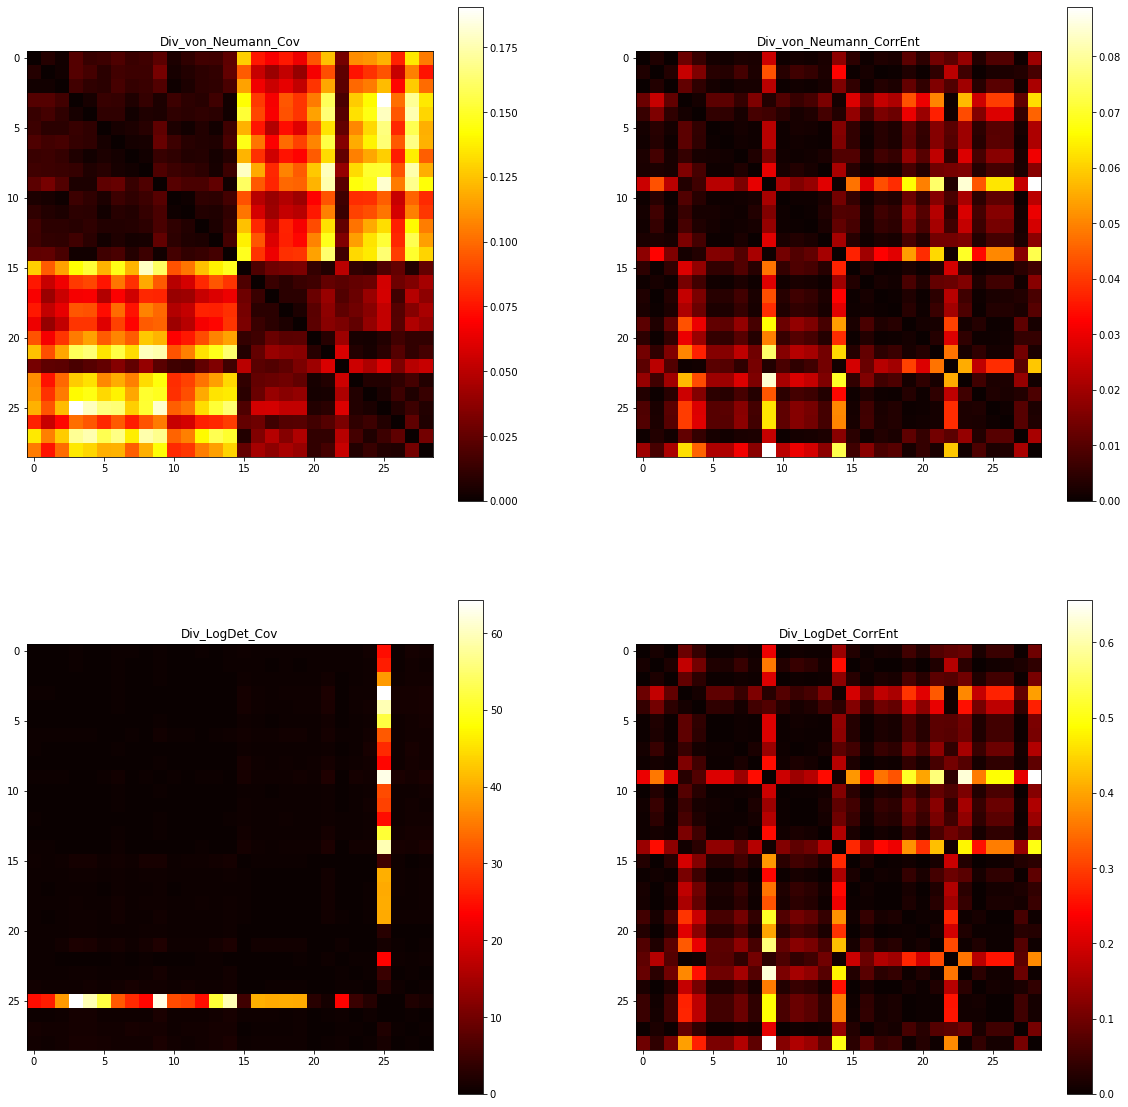

In [9]:
print("Landmine data, linear kernel")
plt.subplots_adjust(wspace=1, hspace=1)

f = plt.figure(figsize=(20,20))

ax1 = f.add_subplot(221)
i1 = ax1.imshow(Div_von_Neumann_Cov, cmap='hot', interpolation='nearest')
plt.title("Div_von_Neumann_Cov")
plt.colorbar(i1,ax=ax1)


ax1 = f.add_subplot(222)
i1 = ax1.imshow(Div_von_Neumann_CorrEnt, cmap='hot', interpolation='nearest')
plt.title("Div_von_Neumann_CorrEnt")
plt.colorbar(i1,ax=ax1)

ax1 = f.add_subplot(223)
i1 = ax1.imshow(Div_LogDet_Cov, cmap='hot', interpolation='nearest')
plt.title("Div_LogDet_Cov")
plt.colorbar(i1,ax=ax1)

ax1 = f.add_subplot(224)
i1 = ax1.imshow(Div_LogDet_CorrEnt, cmap='hot', interpolation='nearest')
plt.title("Div_LogDet_CorrEnt")
plt.colorbar(i1,ax=ax1)



In [10]:
n_dim =  n_dists * n_tasks_dist

von_Neumann_Cov_X =np.zeros((n_dim,n_dim))
von_Neumann_Cov_XY =np.zeros((n_dim,n_dim))
von_Neumann_CorrEnt_X =np.zeros((n_dim,n_dim))
von_Neumann_CorrEnt_XY =np.zeros((n_dim,n_dim))

LogDet_Cov_X =np.zeros((n_dim,n_dim))
LogDet_Cov_XY =np.zeros((n_dim,n_dim))
LogDet_CorrEnt_X =np.zeros((n_dim,n_dim))
LogDet_CorrEnt_XY =np.zeros((n_dim,n_dim))


for i in range(n_dim):        
    for j in range(n_dim):
        von_Neumann_Cov_X[i,j] = von_Neumann_divergence(Tasks_Cov_X[i],Tasks_Cov_X[j])
        von_Neumann_Cov_XY[i,j] = von_Neumann_divergence(Tasks_Cov_XY[i],Tasks_Cov_XY[j])
        von_Neumann_CorrEnt_X[i,j] = von_Neumann_divergence(Tasks_CorrEnt_X[i],Tasks_CorrEnt_X[j])
        von_Neumann_CorrEnt_XY[i,j] = von_Neumann_divergence(Tasks_CorrEnt_XY[i],Tasks_CorrEnt_XY[j])
        LogDet_Cov_X[i,j] = log_det_divergence(Tasks_Cov_X[i],Tasks_Cov_X[j])
        LogDet_Cov_XY[i,j] = log_det_divergence(Tasks_Cov_XY[i],Tasks_Cov_XY[j])
        LogDet_CorrEnt_X[i,j] = log_det_divergence(Tasks_CorrEnt_X[i],Tasks_CorrEnt_X[j])
        LogDet_CorrEnt_XY[i,j] = log_det_divergence(Tasks_CorrEnt_XY[i],Tasks_CorrEnt_XY[j])


Div_von_Neumann_Cov =np.zeros((n_dim,n_dim))
Div_von_Neumann_CorrEnt =np.zeros((n_dim,n_dim))
Div_LogDet_Cov =np.zeros((n_dim,n_dim))
Div_LogDet_CorrEnt =np.zeros((n_dim,n_dim))

for i in range(n_dim):        
    for j in range(i+1):
        Div_von_Neumann_Cov[i,j] = 0.5*(von_Neumann_Cov_XY[i,j] + von_Neumann_Cov_XY[j,i] - von_Neumann_Cov_X[i,j] - von_Neumann_Cov_X[j,i])
        Div_von_Neumann_CorrEnt[i,j] = 0.5*(von_Neumann_CorrEnt_XY[i,j] + von_Neumann_CorrEnt_XY[j,i] - von_Neumann_CorrEnt_X[i,j] - von_Neumann_CorrEnt_X[j,i])
        Div_LogDet_Cov[i,j] = 0.5*(LogDet_Cov_XY[i,j] + LogDet_Cov_XY[j,i] - LogDet_Cov_X[i,j] - LogDet_Cov_X[j,i])
        Div_LogDet_CorrEnt[i,j] = 0.5*(LogDet_CorrEnt_XY[i,j] + LogDet_CorrEnt_XY[j,i] - LogDet_CorrEnt_X[i,j] - LogDet_CorrEnt_X[j,i])
        Div_von_Neumann_Cov[j,i] = Div_von_Neumann_Cov[i,j]
        Div_von_Neumann_CorrEnt[j,i] = Div_von_Neumann_CorrEnt[i,j]
        Div_LogDet_Cov[j,i] = Div_LogDet_Cov[i,j]
        Div_LogDet_CorrEnt[j,i] = Div_LogDet_CorrEnt[i,j]


Landmine data, linear kernel


<Figure size 432x288 with 0 Axes>

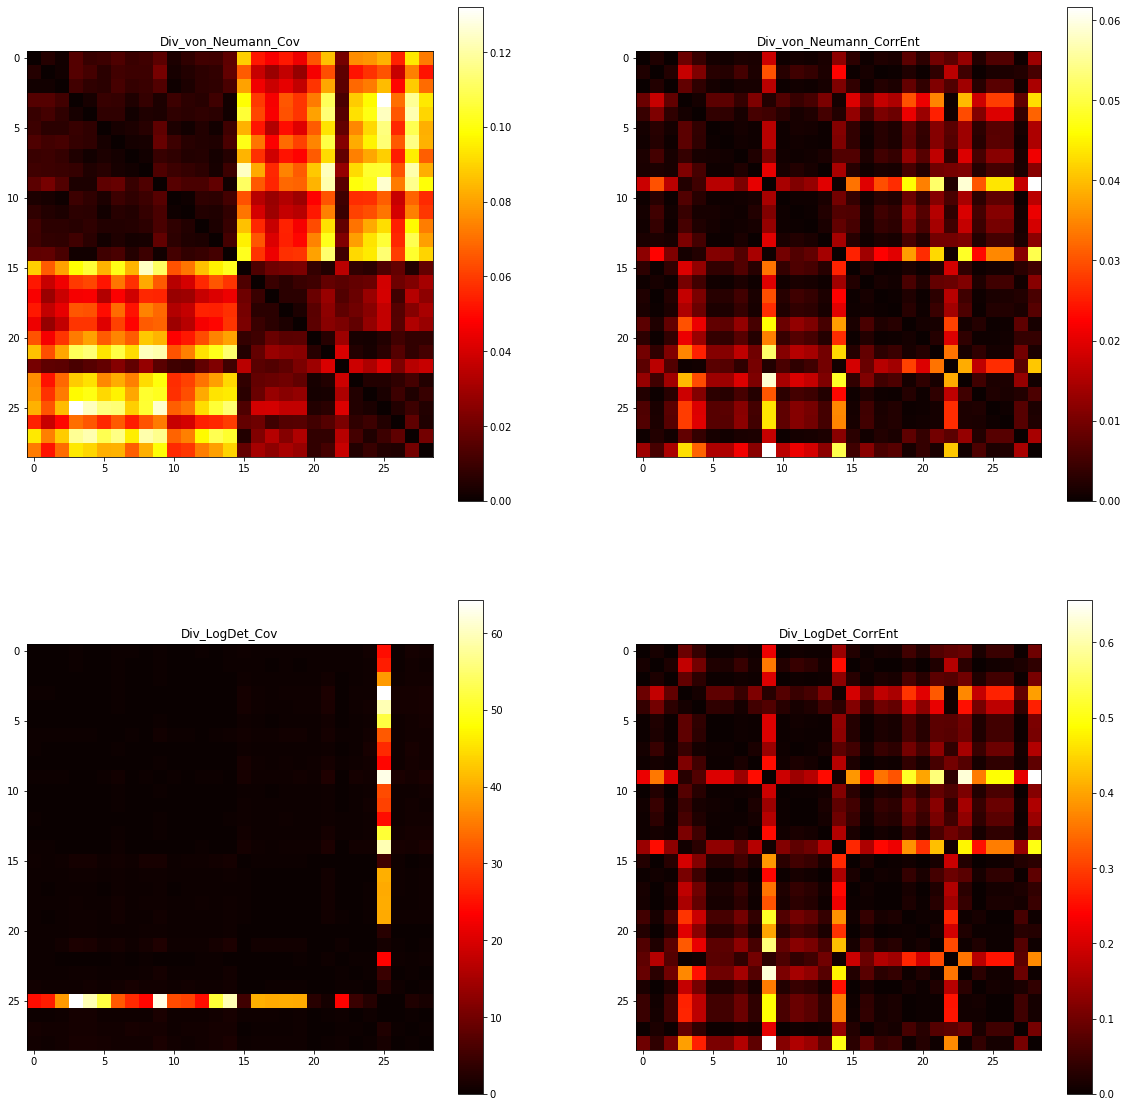

In [11]:
print("Landmine data, linear kernel")
plt.subplots_adjust(wspace=1, hspace=1)

f = plt.figure(figsize=(20,20))

ax1 = f.add_subplot(221)
i1 = ax1.imshow(Div_von_Neumann_Cov, cmap='hot', interpolation='nearest')
plt.title("Div_von_Neumann_Cov")
plt.colorbar(i1,ax=ax1)


ax1 = f.add_subplot(222)
i1 = ax1.imshow(Div_von_Neumann_CorrEnt, cmap='hot', interpolation='nearest')
plt.title("Div_von_Neumann_CorrEnt")
plt.colorbar(i1,ax=ax1)

ax1 = f.add_subplot(223)
i1 = ax1.imshow(Div_LogDet_Cov, cmap='hot', interpolation='nearest')
plt.title("Div_LogDet_Cov")
plt.colorbar(i1,ax=ax1)

ax1 = f.add_subplot(224)
i1 = ax1.imshow(Div_LogDet_CorrEnt, cmap='hot', interpolation='nearest')
plt.title("Div_LogDet_CorrEnt")
plt.colorbar(i1,ax=ax1)



In [12]:
print(sum(Div_von_Neumann_Cov_temp - Div_von_Neumann_Cov))
print(sum(Div_von_Neumann_CorrEnt_temp - Div_von_Neumann_CorrEnt))
print(sum(Div_LogDet_Cov_temp - Div_LogDet_Cov))
print(sum(Div_LogDet_CorrEnt_temp - Div_LogDet_CorrEnt))

[0.46880461 0.35122432 0.41587849 0.54830694 0.54298445 0.46913286
 0.54548404 0.43967881 0.58347144 0.61217136 0.33382609 0.35341092
 0.45363369 0.50001085 0.53612669 0.68947671 0.47541947 0.39012581
 0.47109857 0.43973016 0.51446638 0.72367772 0.28160899 0.58534601
 0.64080785 0.76823844 0.4461533  0.77058807 0.61518534]
[0.05872194 0.06741814 0.0593124  0.18071874 0.11795814 0.0605225
 0.05842232 0.0741626  0.05998054 0.30676187 0.05937017 0.07227675
 0.06742111 0.05965054 0.23214216 0.07744094 0.05544073 0.06716277
 0.060692   0.12419926 0.0795195  0.15666341 0.16915948 0.18572974
 0.07180921 0.11488777 0.115512   0.06025901 0.20117011]
[-3.39897888e-10 -3.89659860e-10 -5.37461631e-10 -8.89728291e-10
 -8.99682995e-10 -7.41961159e-10 -4.18983070e-10 -4.69085215e-10
 -3.13373327e-10 -9.42584677e-10 -4.49031035e-10 -4.19585255e-10
 -3.30969918e-10 -7.74567077e-10 -8.69544436e-10 -9.13367160e-11
 -5.98618932e-10 -5.85699489e-10 -5.98780581e-10 -6.22145002e-10
 -6.01252381e-11 -8.294964

Landmine data, linear kernel


<Figure size 432x288 with 0 Axes>

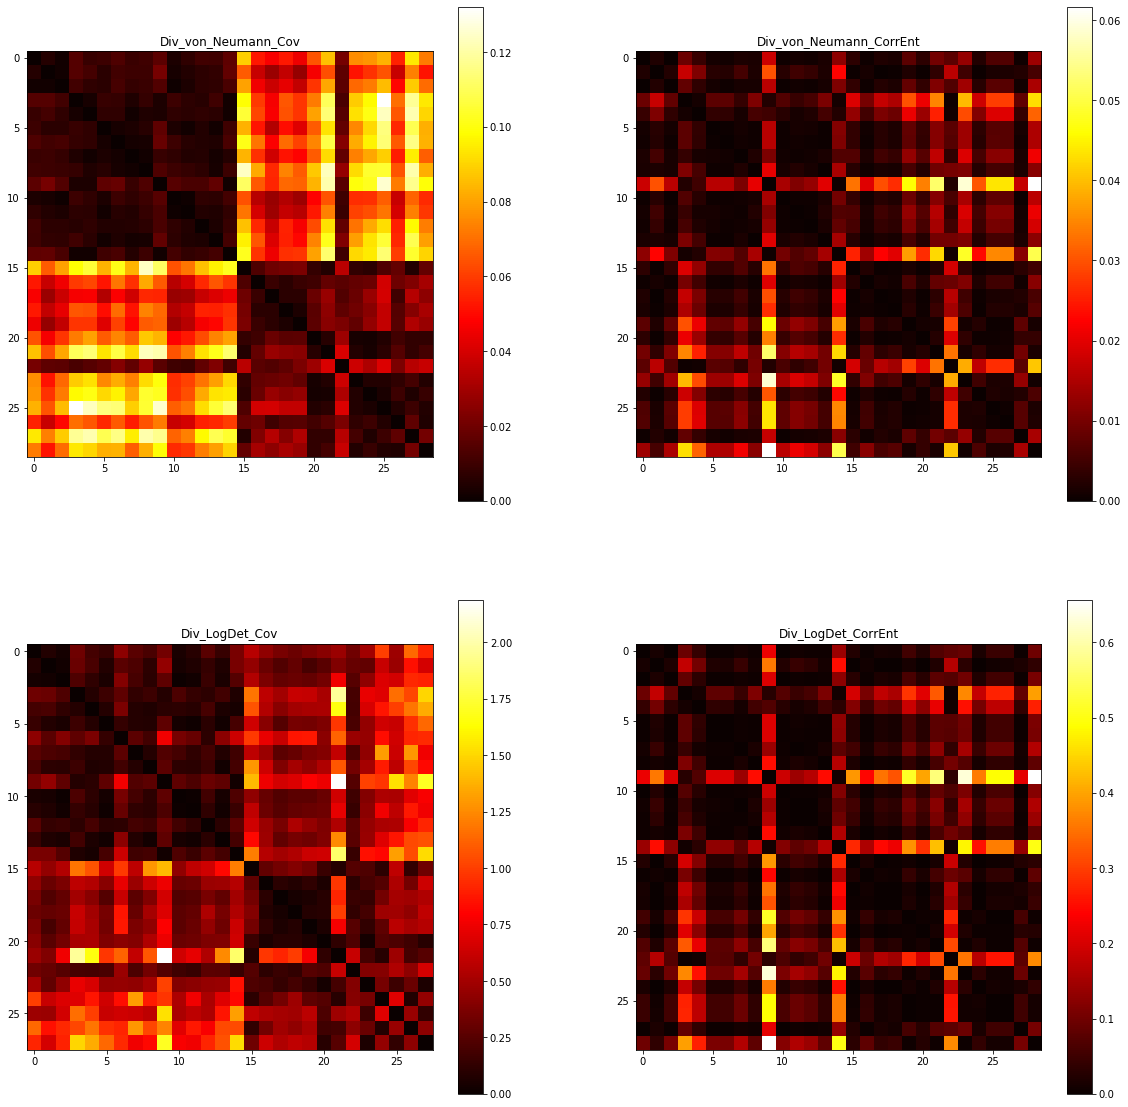

In [13]:
#removing task 25
temp = np.delete(Div_LogDet_Cov,25,0)
temp = np.delete(temp,25,1)

print("Landmine data, linear kernel")
plt.subplots_adjust(wspace=1, hspace=1)

f = plt.figure(figsize=(20,20))

ax1 = f.add_subplot(221)
i1 = ax1.imshow(Div_von_Neumann_Cov, cmap='hot', interpolation='nearest')
plt.title("Div_von_Neumann_Cov")
plt.colorbar(i1,ax=ax1)


ax1 = f.add_subplot(222)
i1 = ax1.imshow(Div_von_Neumann_CorrEnt, cmap='hot', interpolation='nearest')
plt.title("Div_von_Neumann_CorrEnt")
plt.colorbar(i1,ax=ax1)

ax1 = f.add_subplot(223)
i1 = ax1.imshow(temp, cmap='hot', interpolation='nearest')
plt.title("Div_LogDet_Cov")
plt.colorbar(i1,ax=ax1)

ax1 = f.add_subplot(224)
i1 = ax1.imshow(Div_LogDet_CorrEnt, cmap='hot', interpolation='nearest')
plt.title("Div_LogDet_CorrEnt")
plt.colorbar(i1,ax=ax1)

